## TOMOGRAPHY ANALYSIS


The Basic Tomography Analysis is done in the first 3 cells, so that the changes in the number of qubits can be analysed in the tomography plot

**NOTE: CHANGE THE VALUES OF n**, so that to observe the changes in the Tomography plot

In [28]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakePerth
from qiskit_experiments.library import StateTomography

# Define backend
backend = AerSimulator.from_backend(FakePerth())

# Number of qubits 
n = 2   # can be changed to 4 or 6 

# Create GHZ-like state circuit
qc = QuantumCircuit(n)
qc.h(0)
qc.s(0)
for j in range(1, n):
    qc.cx(0, j)

# Perform Quantum State Tomography (QST)
qc_expt = StateTomography(qc)
qc_data = qc_expt.run(backend, seed_simulation=100).block_for_results()

# Print results
for result in qc_data.analysis_results():
    print(result)


AnalysisResult
- name: state
- value: DensityMatrix([[ 0.46940104+0.00000000e+00j,  0.00651042+1.04166667e-02j,
                -0.00569661-1.36718750e-02j,  0.00244141-4.43359375e-01j],
               [ 0.00651042-1.04166667e-02j,  0.03580729+0.00000000e+00j,
                 0.01318359+1.95312500e-03j, -0.00179036+6.83593750e-03j],
               [-0.00569661+1.36718750e-02j,  0.01318359-1.95312500e-03j,
                 0.02766927+0.00000000e+00j,  0.01334635-3.25520833e-04j],
               [ 0.00244141+4.43359375e-01j, -0.00179036-6.83593750e-03j,
                 0.01334635+3.25520833e-04j,  0.4671224 +0.00000000e+00j]],
              dims=(2, 2))
- quality: unknown
- extra: <9 items>
- device_components: ['Q0', 'Q1']
- verified: False
AnalysisResult
- name: state_fidelity
- value: 0.9116210937499993
- quality: unknown
- extra: <9 items>
- device_components: ['Q0', 'Q1']
- verified: False
AnalysisResult
- name: positive
- value: True
- quality: unknown
- extra: <9 items>
- device

In [29]:
state_result = qc_data.analysis_results("state")
print(state_result.value)

DensityMatrix([[ 0.46940104+0.00000000e+00j,  0.00651042+1.04166667e-02j,
                -0.00569661-1.36718750e-02j,  0.00244141-4.43359375e-01j],
               [ 0.00651042-1.04166667e-02j,  0.03580729+0.00000000e+00j,
                 0.01318359+1.95312500e-03j, -0.00179036+6.83593750e-03j],
               [-0.00569661+1.36718750e-02j,  0.01318359-1.95312500e-03j,
                 0.02766927+0.00000000e+00j,  0.01334635-3.25520833e-04j],
               [ 0.00244141+4.43359375e-01j, -0.00179036-6.83593750e-03j,
                 0.01334635+3.25520833e-04j,  0.4671224 +0.00000000e+00j]],
              dims=(2, 2))


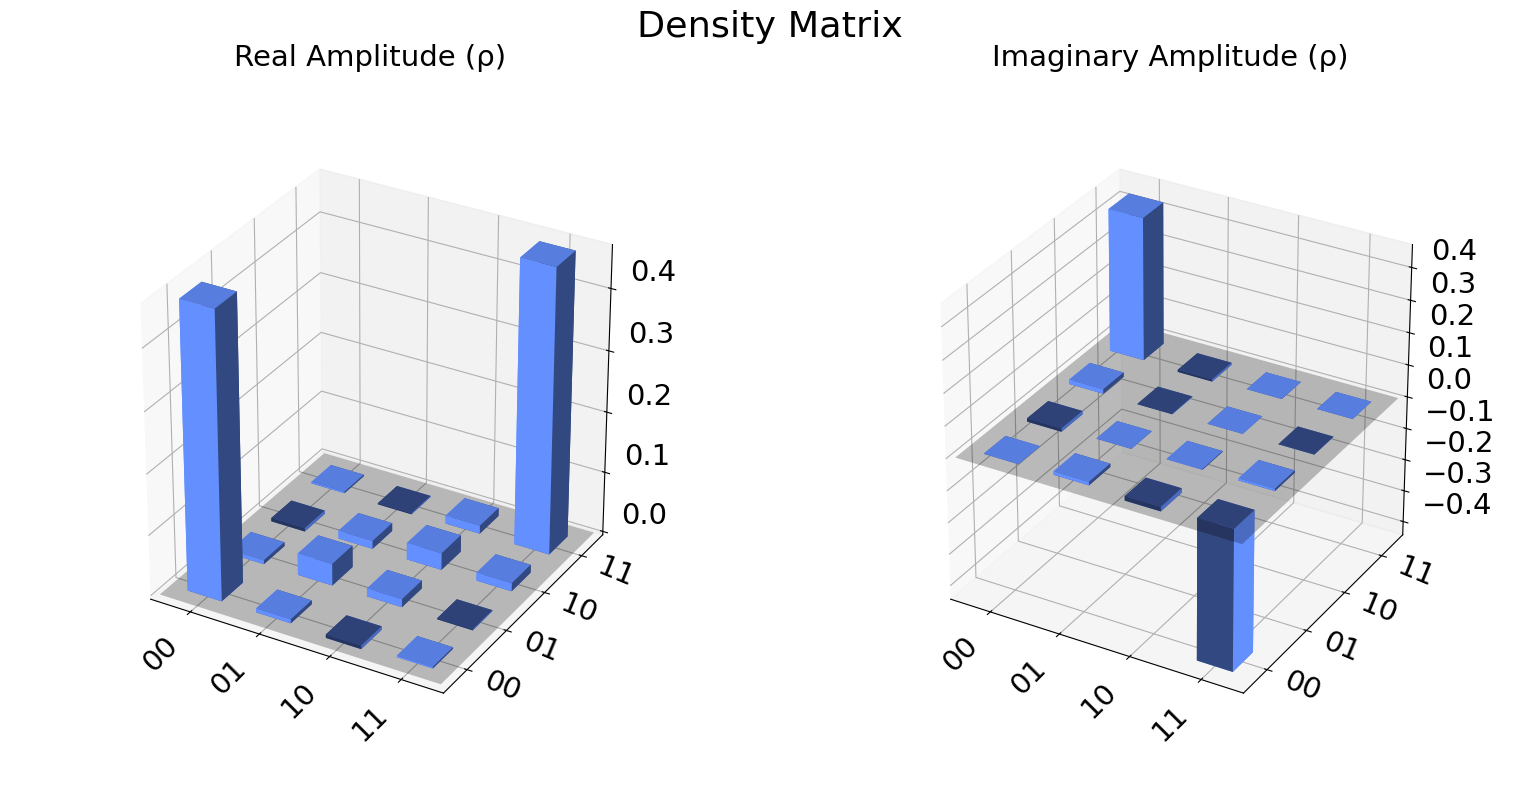

In [30]:
from qiskit.visualization import plot_state_city
plot_state_city(qc_data.analysis_results("state").value, title='Density Matrix')

## Tomography of (4,2,2) Circuit

In [ ]:
from qiskit_experiments.library import StateTomography
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

#Defining the QC

class QECCircuit:
    def _create_circuit(self):
        """Create the quantum circuit with two rounds of syndrome extraction."""
        # Create registers
        data_qubits = QuantumRegister(4, 'q')
        ancilla_qubits = QuantumRegister(2, 'a')
        c1 = ClassicalRegister(2, 'c1')  # First round measurements
        c2 = ClassicalRegister(2, 'c2')  # Second round measurements
        
        qc = QuantumCircuit(data_qubits, ancilla_qubits, c1,c2)
         # Initialize data qubits
        qc.reset(data_qubits[2])
        qc.reset(data_qubits[3])
        qc.h(data_qubits[3])
        
        # Entangle logical qubits
        qc.cx(data_qubits[0], data_qubits[2])
        qc.cx(data_qubits[1], data_qubits[2])
        qc.cx(data_qubits[3], data_qubits[2])
        qc.cx(data_qubits[3], data_qubits[1])
        qc.cx(data_qubits[3], data_qubits[0])
        return qc
    
# Making QEC circuit
qec = QECCircuit()
qec_circuit = qec._create_circuit()

# Applying the state tomography on the QEC circuit

# Applying backend simulation'
backend = AerSimulator()

# Creating state tomography experiment
qstexp_1 = StateTomography(qec_circuit)  

# Run state tomography experiment
qstdata_1 = qstexp_1.run(backend, seed_simulation=100).block_for_results()

# Print results of state tomography
for result in qstdata_1.analysis_results():
    print(result)


AnalysisResult
- name: state
- value: DensityMatrix([[ 4.85599024e-01+0.00000000e+00j,
                 3.93362883e-03+6.74339343e-04j,
                -6.64259922e-04+1.37375657e-03j, ...,
                -4.49519114e-04-1.20884344e-04j,
                 2.09252605e-03-8.86833160e-04j,
                -1.67137697e-03-1.38901139e-03j],
               [ 3.93362883e-03-6.74339343e-04j,
                 6.34195594e-04-8.52633421e-23j,
                 1.22913069e-04+5.29867809e-05j, ...,
                -1.33763460e-04-3.24042091e-04j,
                -2.70141747e-04-1.82031863e-04j,
                -2.47627156e-04-2.10337816e-05j],
               [-6.64259922e-04-1.37375657e-03j,
                 1.22913069e-04-5.29867809e-05j,
                 4.34385521e-04-3.20177142e-20j, ...,
                -1.29724471e-04-1.94747294e-05j,
                -7.43963981e-05+1.82163025e-05j,
                -3.83795084e-05-4.77503122e-05j],
               ...,
               [-4.49519114e-04+1.20884344

In [31]:
state_result = qstdata_1.analysis_results("state")
print(state_result.value)

DensityMatrix([[ 4.85599024e-01+0.00000000e+00j,
                 3.93362883e-03+6.74339343e-04j,
                -6.64259922e-04+1.37375657e-03j, ...,
                -4.49519114e-04-1.20884344e-04j,
                 2.09252605e-03-8.86833160e-04j,
                -1.67137697e-03-1.38901139e-03j],
               [ 3.93362883e-03-6.74339343e-04j,
                 6.34195594e-04-8.52633421e-23j,
                 1.22913069e-04+5.29867809e-05j, ...,
                -1.33763460e-04-3.24042091e-04j,
                -2.70141747e-04-1.82031863e-04j,
                -2.47627156e-04-2.10337816e-05j],
               [-6.64259922e-04-1.37375657e-03j,
                 1.22913069e-04-5.29867809e-05j,
                 4.34385521e-04-3.20177142e-20j, ...,
                -1.29724471e-04-1.94747294e-05j,
                -7.43963981e-05+1.82163025e-05j,
                -3.83795084e-05-4.77503122e-05j],
               ...,
               [-4.49519114e-04+1.20884344e-04j,
                -1.33763460e-04

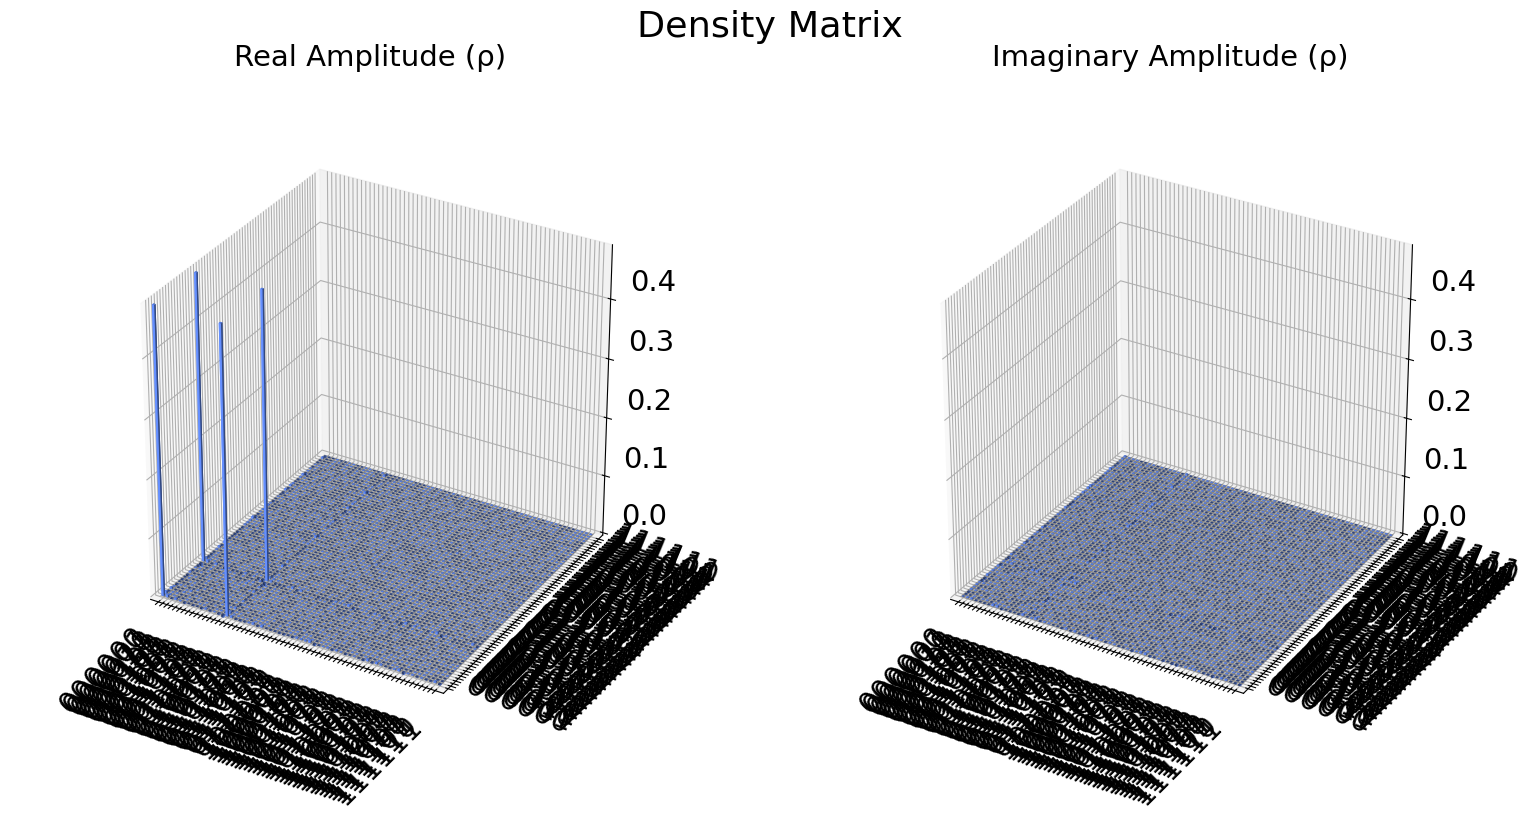

In [32]:
from qiskit.visualization import plot_state_city
plot_state_city(qstdata_1.analysis_results("state").value, title='Density Matrix')
